### Pueba final modulo 3

##  Fase 1: Exploración y Limpieza

In [186]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest


# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [187]:
# Exploración inicial

df_Activity = pd.read_csv('Customer Flight Activity.csv')
df_Activity.head()



,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [188]:
df_Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [189]:
df_Activity.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [190]:
df_Activity.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [191]:

df_Activity.isnull().sum() # Devuelve la cantidad de valores nulos en cada columna.
nulos = df_Activity.isnull().sum()/df_Activity.shape[0]*100 # % nulos
nulos.sort_values(ascending=False) # % nulos ordenados de mayor a menor

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [192]:
df_Activity.duplicated().sum()

np.int64(1864)

In [193]:
df_Activity.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [194]:
df_History = pd.read_csv('Customer Loyalty History.csv')
df_History.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [195]:
df_History.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [196]:
df_History.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [197]:
df_History.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [198]:

df_History.isnull().sum() # Devuelve la cantidad de valores nulos en cada columna.
nulos = df_History.isnull().sum()/df_History.shape[0]*100 # % nulos
nulos.sort_values(ascending=False) # % nulos ordenados de mayor a menor

Cancellation Month    87.650117
Cancellation Year     87.650117
Salary                25.321145
Loyalty Number         0.000000
City                   0.000000
Postal Code            0.000000
Province               0.000000
Country                0.000000
Education              0.000000
Gender                 0.000000
Marital Status         0.000000
Loyalty Card           0.000000
Enrollment Type        0.000000
CLV                    0.000000
Enrollment Month       0.000000
Enrollment Year        0.000000
dtype: float64

In [199]:
df_History.duplicated().sum()

np.int64(0)

In [200]:
# Funcion para extraer y tranformar los datos.


import pandas as pd # Importamos libreria



# EXTRACT: Obtener los datos desde los archivos CSV


def extract_data(file_path):
    print(f"Extrayendo datos desde {file_path}...")
    data = pd.read_csv(file_path)
    print(data.head())
    print(data.info())
    print(data.describe())
    return data


# TRANSFORM: Limpiar y transformar los datos


def transform_data(data, deleteDataFrame):
    print("Transformando datos...")
    
    data.columns = data.columns.str.lower() # Renombrar las columnas con minúsculas
    data.isnull().sum() # Devuelve la cantidad de valores nulos en cada columna.
    nulos = data.isnull().sum()/data.shape[0]*100 # % nulos
    nulos.sort_values(ascending=False) # % nulos ordenados de mayor a menor
    if deleteDataFrame :
      data.drop(columns=['cancellation month','cancellation year' ], inplace=True)  #Elimina columnas del DataFrame.
    data.duplicated().sum() # Devuelve el número total de filas duplicadas en el DataFrame.
    print(data.head())
    return data


# Proceso completo

def process(name_file, deleteDataFrame):
    data = extract_data(name_file)
    transformed_data = transform_data(data, deleteDataFrame)
    return transformed_data



actividad_clientes_transformed = process('Customer Flight Activity.csv', False)
clientes_transformed = process('Customer Loyalty History.csv', True)
        

Extrayendo datos desde Customer Flight Activity.csv...
   Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed  
0                            0  
1                        

In [201]:
actividad_clientes_transformed.isnull().sum()

loyalty number                 0
year                           0
month                          0
flights booked                 0
flights with companions        0
total flights                  0
distance                       0
points accumulated             0
points redeemed                0
dollar cost points redeemed    0
dtype: int64

In [202]:
clientes_transformed.isnull().sum()

loyalty number         0
country                0
province               0
city                   0
postal code            0
gender                 0
education              0
salary              4238
marital status         0
loyalty card           0
clv                    0
enrollment type        0
enrollment year        0
enrollment month       0
dtype: int64

In [203]:
df_union = pd.merge(actividad_clientes_transformed, clientes_transformed, on= 'loyalty number') # Unimos las tablas por la columna 'loyalty number'



In [204]:
df_union.info() #verificando las tablas se unieron

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty number               405624 non-null  int64  
 1   year                         405624 non-null  int64  
 2   month                        405624 non-null  int64  
 3   flights booked               405624 non-null  int64  
 4   flights with companions      405624 non-null  int64  
 5   total flights                405624 non-null  int64  
 6   distance                     405624 non-null  int64  
 7   points accumulated           405624 non-null  float64
 8   points redeemed              405624 non-null  int64  
 9   dollar cost points redeemed  405624 non-null  int64  
 10  country                      405624 non-null  object 
 11  province                     405624 non-null  object 
 12  city                         405624 non-null  object 
 13 

In [205]:
# Tratar valores nulos

nulos = df_union.isnull().sum()
nulos

loyalty number                      0
year                                0
month                               0
flights booked                      0
flights with companions             0
total flights                       0
distance                            0
points accumulated                  0
points redeemed                     0
dollar cost points redeemed         0
country                             0
province                            0
city                                0
postal code                         0
gender                              0
education                           0
salary                         102672
marital status                      0
loyalty card                        0
clv                                 0
enrollment type                     0
enrollment year                     0
enrollment month                    0
dtype: int64

In [206]:
df_rellenado = df_union.fillna(0)  # Rellenar con 0
print(df_rellenado)

        loyalty number  year  month  flights booked  flights with companions  \
0               100018  2017      1               3                        0   
1               100102  2017      1              10                        4   
2               100140  2017      1               6                        0   
3               100214  2017      1               0                        0   
4               100272  2017      1               0                        0   
...                ...   ...    ...             ...                      ...   
405619          999902  2018     12               0                        0   
405620          999911  2018     12               0                        0   
405621          999940  2018     12               3                        0   
405622          999982  2018     12               0                        0   
405623          999986  2018     12               0                        0   

        total flights  distance  points

In [207]:
df_union.dtypes

loyalty number                   int64
year                             int64
month                            int64
flights booked                   int64
flights with companions          int64
total flights                    int64
distance                         int64
points accumulated             float64
points redeemed                  int64
dollar cost points redeemed      int64
country                         object
province                        object
city                            object
postal code                     object
gender                          object
education                       object
salary                         float64
marital status                  object
loyalty card                    object
clv                            float64
enrollment type                 object
enrollment year                  int64
enrollment month                 int64
dtype: object

In [208]:

imputer_iter = IterativeImputer(max_iter = 10, random_state = 42) # tecnicas avanzadas para tratar valores nulos
df_union['salary'] = imputer_iter.fit_transform(df_union[['salary']])

In [209]:
nulos = df_union.isnull().sum()
nulos

loyalty number                 0
year                           0
month                          0
flights booked                 0
flights with companions        0
total flights                  0
distance                       0
points accumulated             0
points redeemed                0
dollar cost points redeemed    0
country                        0
province                       0
city                           0
postal code                    0
gender                         0
education                      0
salary                         0
marital status                 0
loyalty card                   0
clv                            0
enrollment type                0
enrollment year                0
enrollment month               0
dtype: int64

In [210]:
df_union.describe().T

,count,mean,std,min,25%,50%,75%,max
loyalty number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.000000,772194.00,999986.00
year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.500000,2018.00,2018.00
month,405624.0,6.500000,3.452057,1.00,3.75,6.500000,9.25,12.00
flights booked,405624.0,4.115052,5.225518,0.00,0.00,1.000000,8.00,21.00
flights with companions,405624.0,1.031805,2.076869,0.00,0.00,0.000000,1.00,11.00
total flights,405624.0,5.146858,6.521227,0.00,0.00,1.000000,10.00,32.00
distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.000000,2336.00,6293.00
points accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.000000,239.00,676.50
points redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.000000,0.00,876.00
dollar cost points redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.000000,0.00,71.00


In [211]:
df_union.dtypes

loyalty number                   int64
year                             int64
month                            int64
flights booked                   int64
flights with companions          int64
total flights                    int64
distance                         int64
points accumulated             float64
points redeemed                  int64
dollar cost points redeemed      int64
country                         object
province                        object
city                            object
postal code                     object
gender                          object
education                       object
salary                         float64
marital status                  object
loyalty card                    object
clv                            float64
enrollment type                 object
enrollment year                  int64
enrollment month                 int64
dtype: object

##  Fase 2: Visualización

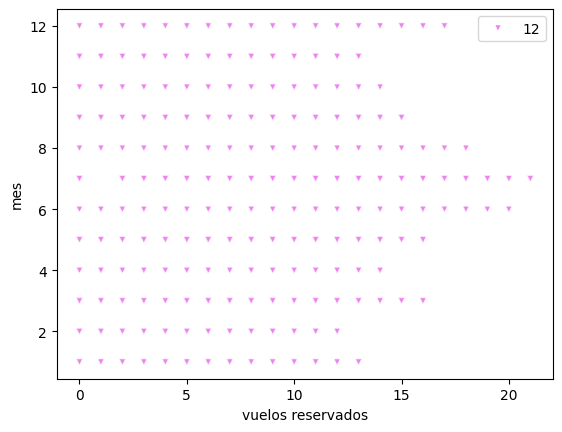

In [212]:
#1-  . ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

# gráfico de dispersión
sns.scatterplot(x = 'flights booked', # Scatterplot : exploración dos variables numéricas a la vez. Nos ayuda a identificar patrones, tendencias o correlaciones entre las dos variables.
                y = 'month', 
                data = df_union, 
                size = 12, 
                marker= 'v', 
                color = 'violet')

# cambiamos los nombres de los ejes
plt.xlabel('vuelos reservados')
plt.ylabel('mes');



### Elementos clave del gráfico ###

- Eje X (flights booked):
Representa la cantidad de vuelos reservados.
Indica la variabilidad en las reservas de vuelos por cliente o registro.

- Eje Y (month):
Representa los meses del año (1 a 12).
Cada punto está asociado con un mes específico.

- Tamaño (size=12):
Define el tamaño uniforme de los puntos en el gráfico.

- Forma (marker='v'):
Todos los puntos tienen la forma de triángulos invertidos.

- Color (color='violet'):
Todos los puntos son del mismo color, facilitando la visualización.

## Analisis ##
Patrones generales:

- Busca si hay meses donde se concentran más puntos. Esto indica los meses con más actividad en términos de vuelos reservados.
El mes 7 (julio) tiene muchos puntos hacia la derecha del gráfico, se podria concluir que en julio se reservan más vuelos.

- Se relación clara entre los meses y la cantidad de vuelos reservados.
Si los puntos tienden a acumularse más en meses específicos, esto podría indicar una temporada alta.

- Si los puntos están concentrados, sugiere que los valores de reservas son similares.

Muchos puntos concentrados en el eje Y en los meses 6 y 7 (junio y julio).
En esos meses, hay puntos en el eje X que van hasta 20 vuelos reservados.
En el resto de los meses, los valores de reservas están entre 10 y 15.

Junio y julio podrían ser temporada alta para la aerolínea, con un mayor número de vuelos reservados.
La mayoría de los clientes reserva menos de 5 vuelos en un mes normal.
Algunos valores altos en meses específicos podrían indicar viajeros corporativos o frecuentes.

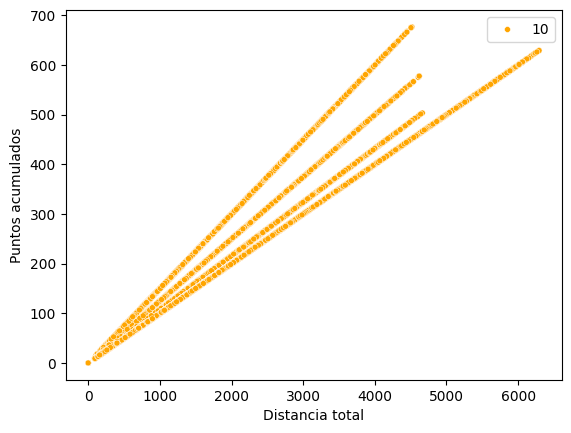

In [214]:
#2- . ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

sns.scatterplot(x = 'Distance',  #grafico de Regresión
                y = 'Points Accumulated', 
                data = df, 
                size = 10, 
                marker= "o", 
                color = "orange")


# cambiamos los nombres de los ejes
plt.xlabel('Distancia total')
plt.ylabel('Puntos acumulados');

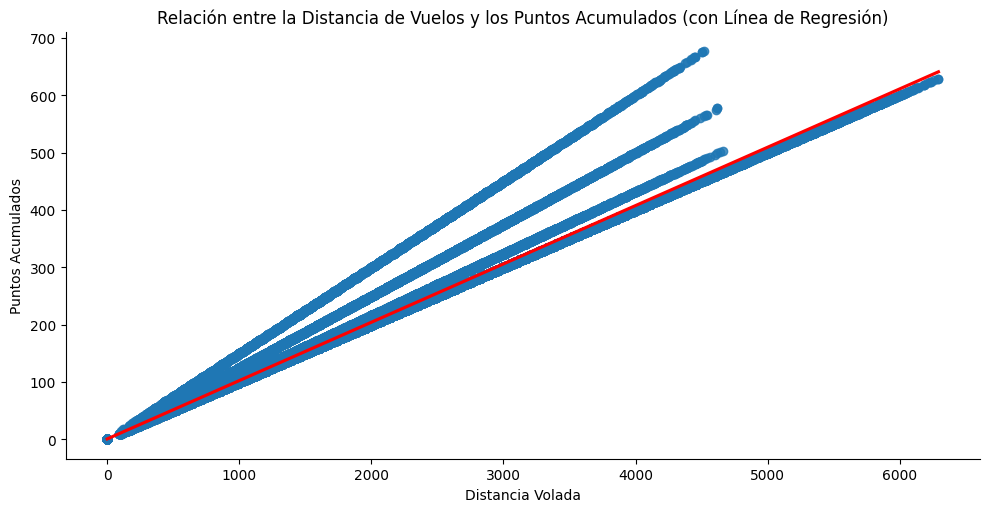

In [ ]:
sns.lmplot(x='distance', y='points accumulated', data=df_union, aspect=2, line_kws={'color': 'red'}) #grafico de Regresión

# Personalizar el gráfico
plt.title('Relación entre la Distancia de Vuelos y los Puntos Acumulados (con Línea de Regresión)')
plt.xlabel('Distancia Volada')
plt.ylabel('Puntos Acumulados')
plt.show()

## Analisis ##

- La línea roja muestra la tendencia general:
Si es creciente, hay una relación positiva (más distancia → más puntos).
Si es horizontal, no hay relación.

- La línea de regresión (en rojo) representa la tendencia general entre la distancia volada y los puntos acumulados.
Si la línea tiene una pendiente positiva, significa que a medida que aumenta la distancia volada, los puntos acumulados también aumentan.

Podriamos concluir que a medida que los clientes vuelan más lejos, acumulan más puntos en el programa de lealtad. Esto sugiere que la aerolínea premia a los clientes con más puntos por vuelos más largos.

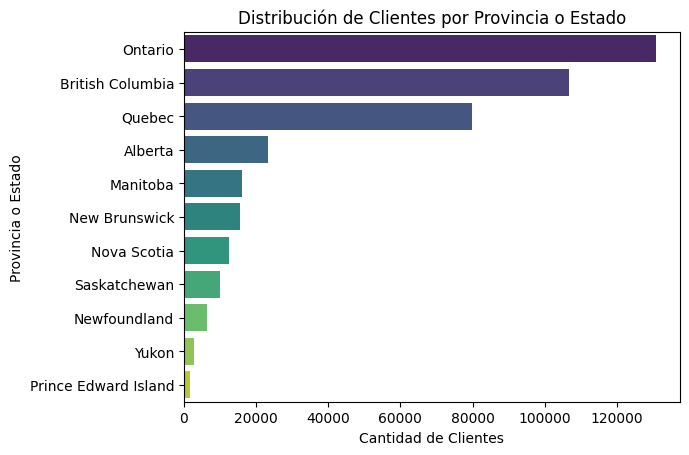

In [148]:
#3- ¿Cuál es la distribución de los clientes por provincia o estado?

sns.countplot(y='province', data=df_union, palette='viridis', order=df_union['province'].value_counts().index) #Gráfico de Conteo (CountPlot)

# Personalizar el gráfico
plt.title('Distribución de Clientes por Provincia o Estado')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Provincia o Estado')
plt.show()

## Analisis ##


- Observa las barras más largas en el gráfico. Estas representan las provincias o estados donde se concentra la mayor cantidad de clientes.

- Las barras más cortas. Estas pueden corresponder a provincias menos pobladas, zonas remotas o regiones con menor acceso a servicios de la aerolínea.

- Si alguna provincia tiene una cantidad de clientes mucho mayor o menor en comparación con el resto, podría deberse a factores como promociones locales o infraestructura.

- Las provincias con mayor cantidad de clientes podrían ser las más rentables para la aerolínea, lo que sugiere que deben ser priorizadas en estrategias de marketing y promociones.

- Las provincias con menor cantidad de clientes podrían representar mercados potenciales a desarrollar. Por ejemplo, campañas específicas para aumentar la presencia en estas regiones.

Si hay una clara disparidad, podríamos concluir que la distribución de clientes no es uniforme y está influenciada por factores como población, acceso a transporte aéreo, o ingresos.Este análisis puede informar decisiones como dónde establecer nuevas rutas, incrementar promociones o expandir servicios.

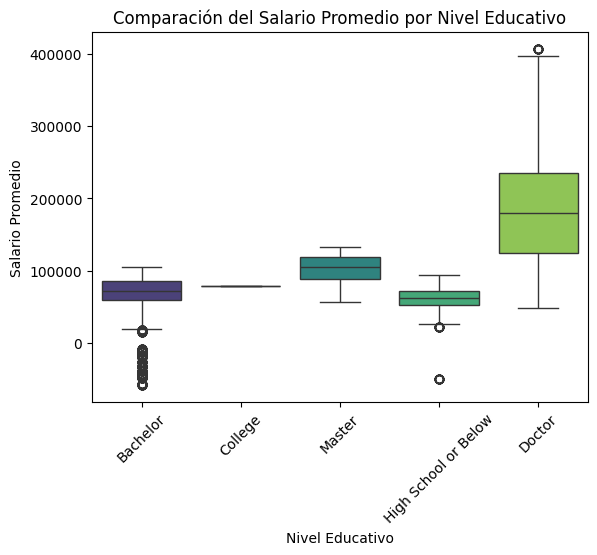

In [216]:
#4- . ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?


sns.boxplot(x='education', y='salary', data=df_union, palette='viridis')

# Personalizar el gráfico
plt.title('Comparación del Salario Promedio por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.xticks(rotation=45)  # Rotar etiquetas si son largas
plt.show()


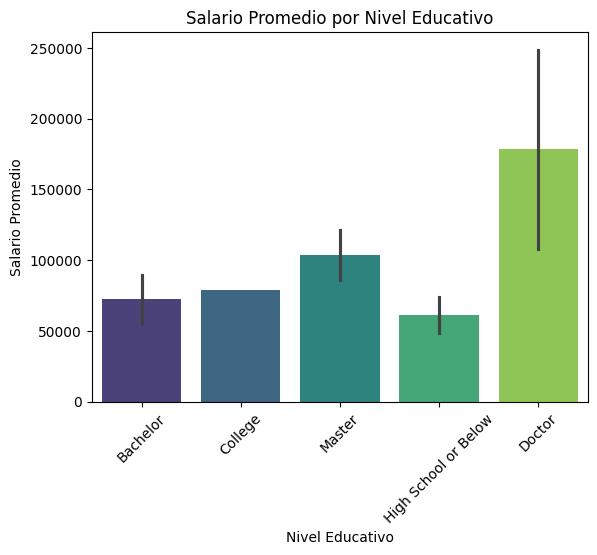

In [217]:
sns.barplot(x='education', y='salary', data=df_union, estimator='mean', ci='sd', palette='viridis')

# Personalizar el gráfico
plt.title('Salario Promedio por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.xticks(rotation=45)
plt.show()

## Análisis ##

- El gráfico generado es un boxplot (diagrama de caja) que compara el salario promedio entre diferentes niveles educativos de los clientes. Este tipo de gráfico es útil para visualizar la distribución de los salarios en relación con las categorías de nivel educativo. 

- Si los niveles educativos más altos tienen una mediana de salario más alta, podríamos concluir que, en promedio, las personas con mayor educación ganan más. Esto podría ser una indicación de que la aerolínea o los clientes en la base de datos siguen una tendencia general de que la educación está relacionada con mejores remuneraciones.

- Si algunos niveles educativos tienen muchos outliers, podría ser necesario investigar si estos puntos atípicos son errores de datos o si representan un grupo de clientes que tienen situaciones salariales excepcionales (por ejemplo, un cliente con un nivel educativo bajo que gana mucho más por otros factores).

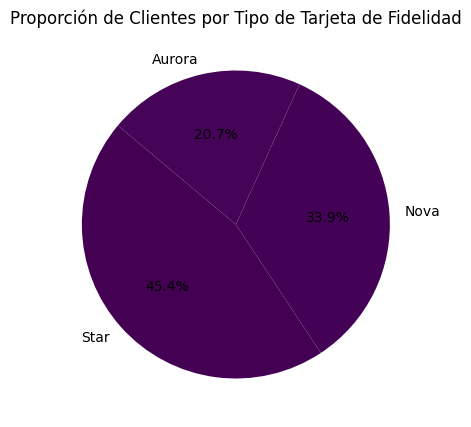

In [167]:
#5- . ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

# Calcular la proporción de cada tipo de tarjeta con un Pie Chart
conteo_categorias = df_union['loyalty card'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(5, 5)) #tamaño
plt.pie(conteo_categorias, labels=conteo_categorias.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis.colors)

# Personalizar el gráfico
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')
plt.show()

## Análisis ##

- El gráfico de pastel muestra la proporción de clientes que tienen diferentes tipos de tarjetas de fidelidad. Cada segmento está etiquetado con el porcentaje correspondiente de clientes que poseen cada tipo de tarjeta.

- El tamaño de cada segmento es proporcional al número de clientes con ese tipo de tarjeta.

- Los porcentajes en cada segmento proporcionan una visión clara de qué clientes posee cada tipo de tarjeta. Los valores en los segmentos te permiten comparar las proporciones relativas.


Si un segmento es considerablemente más grande que los otros, esto sugiere que ese tipo de tarjeta es el más popular entre los clientes.
Por ejemplo, si el segmento "Star" es mucho más grande que los demás, esto podría indicar que la mayoría de los clientes se encuentran en el nivel Star, lo cual podría ser el nivel estándar de la aerolínea.

Si, por ejemplo, una tarjeta tiene una proporción muy baja de clientes, la aerolínea podría necesitar mejorar sus beneficios para atraer más clientes a ese nivel o repensar cómo incentivar a los clientes para que suban de nivel.
Por otro lado, si la tarjeta "Standard" tiene una proporción alta, la aerolínea podría considerar incentivar a los clientes para que suban a tarjetas con más beneficios a través de promociones o campañas dirigidas.
Acciones Posibles:


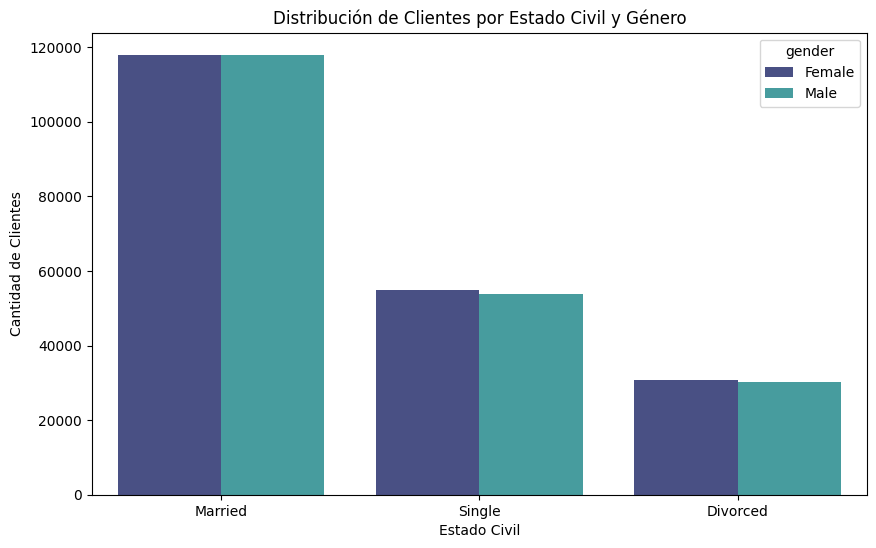

In [ ]:
#6-. ¿Cómo se distribuyen los clientes según su estado civil y género?


# Crear un gráfico de barras apiladas para estado civil y género
plt.figure(figsize=(10, 6))
sns.countplot(x='marital status', hue='gender', data=df_union, palette='mako')

# Personalizar el gráfico
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.show()

## Análisis ##

- El eje X representa las categorías de estado civil de los clientes (por ejemplo, Soltero, Casado, Divorciado, etc.).

- El eje Y muestra la cantidad de clientes en cada categoría de estado civil.

- Las barras apiladas están diferenciadas por género, lo que significa que cada barra está dividida en segmentos que representan la proporción de hombres y mujeres dentro de cada estado civil.

- El gráfico te permite ver la proporción de hombres y mujeres dentro de cada categoría de estado civil. Por ejemplo:
Si la barra para "Soltero" tiene un segmento grande para "Masculino" y uno pequeño para "Femenino", esto indica que la mayoría de los clientes solteros son hombres.
Si la barra para "Casado" tiene segmentos más equilibrados entre hombres y mujeres, eso indica que el estado civil de "Casado" está más equilibrado entre los géneros.


Si una categoría de estado civil (como "Casado") tiene proporciones casi iguales de género, eso puede sugerir que tanto hombres como mujeres están igualmente representados en esa categoría.
Si otra categoría (como "Divorciado" o "Soltero") tiene una barra más alta para un género específico, indica que un género predomina en esa categoría. Por ejemplo, si "Soltero" tiene más clientes masculinos, podría implicar que una mayor proporción de hombres no están casados.

Podrías notar que ciertos estados civiles, como "Soltero" o "Casado", tienen muchas más personas que otros estados civiles (por ejemplo, "Divorciado" o "Viudo"). Esto puede indicar que la mayoría de los clientes están solteros o casados, lo cual es una tendencia social común.
Segmentación de Clientes por Género:

Si encuentras que un género está mucho más representado en ciertos estados civiles, esto podría ser útil para realizar segmentaciones de marketing o para identificar características demográficas de tu base de clientes.
Por ejemplo, si el segmento de "Casados" está más equilibrado en género, podrías enfocar tus campañas para parejas. Mientras que si "Solteros" tiene una mayor proporción de hombres, tal vez sea relevante crear promociones dirigidas a ese género.

##  Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

In [222]:
#1- Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'

df_filtrado = df_union[['flights booked', 'education']].copy()

# Visualizar los primeros datos para confirmar
df_filtrado .head()

,flights booked,education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor


In [225]:
#2-  Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada grupo.

df_agrupado = df_filtrado.groupby('education')['flights booked']

df_agrupado.describe().T

education,Bachelor,College,Doctor,High School or Below,Master
count,253752.000000,102672.000000,17856.000000,19008.000000,12336.000000
mean,4.091093,4.153012,4.146281,4.155777,4.184014
std,5.216995,5.242136,5.250093,5.234551,5.210294
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


In [ ]:
#3-  Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.